In [1]:
from basicGP import BasicGP
from blackBoxFunction import BlackBoxFunction as BBF

import pandas as pd
import math
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random

%matplotlib inline  
%load_ext autoreload
%autoreload 2

np.random.seed(0)

## Show points that are sampled

In [2]:
%autoreload 2

# Training data (without noise)
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = BBF.eval(Xtrain)

# Prediction data
n = 50
Xpred = np.linspace(-5, 5, n).reshape(-1,1)

In [3]:
%autoreload 2

GP = BasicGP(kernel_param=0.1)
GP.set_datapoints(Xtrain, ytrain)
GP.set_predictant(Xpred)

GP.calculate_kernels()

mean_vec = GP.predict_mean()
stddev_vec = GP.predict_stddev()

[ 0.9999773   0.99911291  0.98482709  0.88185022  0.53512662  0.06483626
  0.62764722  0.89639736  0.85044798  0.48312813  0.12866441  0.66952958
  0.90545292  0.82868417  0.42924457  0.19182893  0.70811599  0.91146737
  0.80361233  0.37290176  0.25396967  0.74696167  0.9535155   0.99593676
  0.99983989  0.9998399   0.99593694  0.95351763  0.7469736   0.2539957
  0.37320408  0.80975953  0.96960189  0.99773417  0.99992561  0.99999894
  0.99999999  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.        ]


/Users/davidal/GoogleDrive/BachelorThesis/basicGP.py:52: RuntimeWarning: invalid value encountered in sqrt
  return np.diagonal(np.sqrt(res)).reshape((-1,))


(50,)
(50, 1)
(50,)


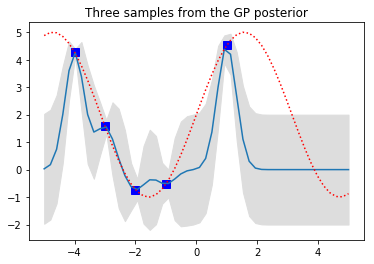

In [6]:
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xpred, mean_vec)
plt.plot(Xpred, BBF.eval(Xpred), 'r:', label=u'$f(x) = x\,\sin(x)$')

print(stddev_vec.shape)
print(Xpred.shape)
print(mean_vec.shape)

plt.gca().fill_between(Xpred.reshape(-1,), mean_vec-2*stddev_vec, mean_vec+2*stddev_vec, color="#dddddd")

plt.title('Three samples from the GP posterior')
plt.show()